In [17]:
import numpy as np
import pandas as pd

class Multinomial_NB:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, Y):
        mu_jc = np.array([])
        
        for j in range(len(Y)):
            document_count = zip(np.unique(Y, return_counts))
            sum = np.sum(X[:, j]*document)
            for i in range(len(X)):
                sum += X[i][j]
        
    
    def predict(self, X):
        pass
    
    def predict_proba(self, X):
        pass
    
    def predict_log_proba(self, X):
        pass

In [48]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer,  PorterStemmer

df = pd.read_csv("./datasets/SMSSpamCollection.csv",header=None,names=["label","text"])

#lemmatizing
lemmatizer = WordNetLemmatizer()
df['text_lemmatized'] = df['text'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)))

#stemming
stemmer= PorterStemmer()
stem_list=[]
for i in range(df.shape[0]):
    word_list = nltk.word_tokenize(df['text'][i])
    stem_list.append(' '.join([stemmer.stem(w) for w in word_list]))
df['text_stemmed']=stem_list

#generate bags of words
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True)
X = count_vect.fit_transform(df['text']).todense()
X_lem = count_vect.fit_transform(df['text_lemmatized']).todense()
X_stem = count_vect.fit_transform(df['text_stemmed']).todense()



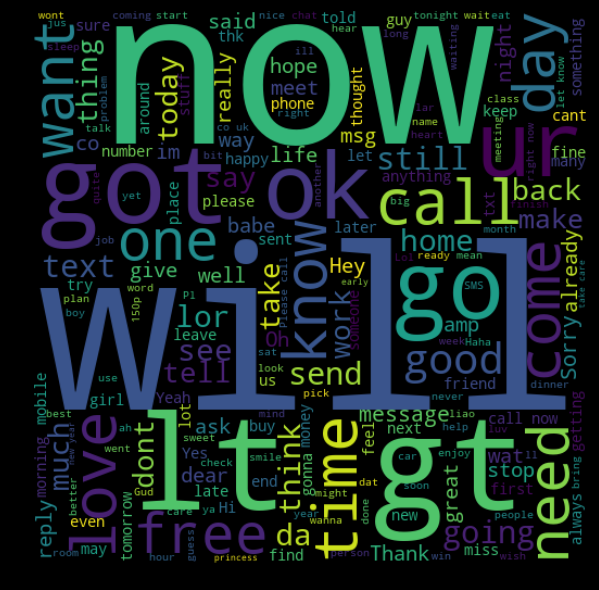

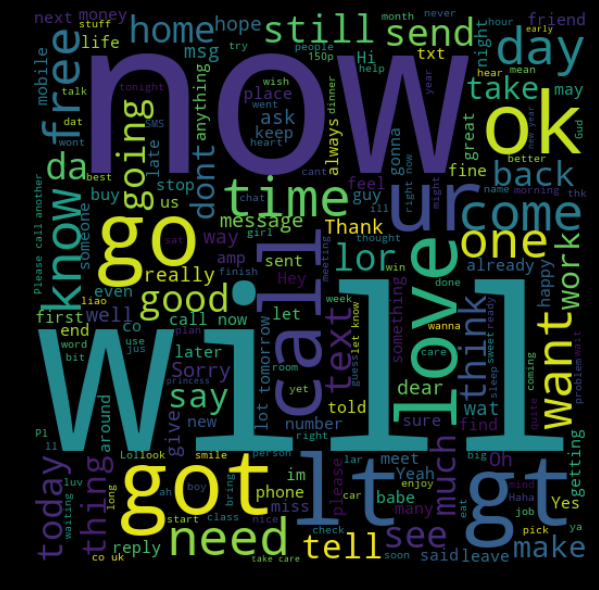

In [61]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt


all_spam_words = ''.join(df['text'][df['label']=='spam'])
spam_wordclod = WordCloud(width = 512,height = 512).generate(all_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

all_ham_words = ''.join(df['text'][df['label']=='ham'])
ham_wordclod = WordCloud(width = 512,height = 512).generate(all_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wordclod, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()